<a href="https://colab.research.google.com/github/prahladpunia/AI/blob/main/TRANSFER_MODEL_INCEPTION3_FOR_CATS_DOGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning    
######Using inception 3 model trained on Imagenet
####Using on CAT & DOGS Dataset

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /content/drive/MyDrive/TFR/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-04-02 14:39:49--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/content/drive/MyDrive/TFR/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/content/drive/MyDr 100%[===================>]  83.84M  41.7MB/s    in 2.0s    

2022-04-02 14:39:51 (41.7 MB/s) - ‘/content/drive/MyDrive/TFR/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
local_weights_file = '/content/drive/MyDrive/TFR/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)


In [ ]:
pre_trained_model.load_weights(local_weights_file)

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
#pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)

In [ ]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)  

In [ ]:
model = Model( pre_trained_model.input, x) 

In [ ]:
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#Down load the cats and dogs datset

In [ ]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /content/drive/MyDrive/TFR/cats_and_dogs_filtered.zip

--2022-04-02 14:56:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 142.250.97.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/drive/MyDrive/TFR/cats_and_dogs_filtered.zip’

/content/drive/MyDr 100%[===================>]  65.43M  45.9MB/s    in 1.4s    

2022-04-02 14:56:21 (45.9 MB/s) - ‘/content/drive/MyDrive/TFR/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/TFR/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/drive/MyDrive/TFR')
zip_ref.close()

In [ ]:
# Define our example directories and files
base_dir = '/content/drive/MyDrive/TFR/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [ ]:
train_cat_fnames[:10]

['cat.127.jpg',
 'cat.126.jpg',
 'cat.125.jpg',
 'cat.124.jpg',
 'cat.123.jpg',
 'cat.122.jpg',
 'cat.121.jpg',
 'cat.120.jpg',
 'cat.119.jpg',
 'cat.118.jpg']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))

Found 2000 images belonging to 2 classes.


In [ ]:
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
100/100 - 170s - loss: 0.3423 - acc: 0.8665 - val_loss: 0.1748 - val_acc: 0.9410 - 170s/epoch - 2s/step
Epoch 2/20
100/100 - 166s - loss: 0.2105 - acc: 0.9220 - val_loss: 0.1179 - val_acc: 0.9600 - 166s/epoch - 2s/step
Epoch 3/20
100/100 - 165s - loss: 0.2084 - acc: 0.9265 - val_loss: 0.1145 - val_acc: 0.9650 - 165s/epoch - 2s/step
Epoch 4/20
100/100 - 166s - loss: 0.2074 - acc: 0.9155 - val_loss: 0.1411 - val_acc: 0.9500 - 166s/epoch - 2s/step
Epoch 5/20
100/100 - 167s - loss: 0.1858 - acc: 0.9250 - val_loss: 0.1159 - val_acc: 0.9670 - 167s/epoch - 2s/step
Epoch 6/20
100/100 - 168s - loss: 0.1813 - acc: 0.9370 - val_loss: 0.2449 - val_acc: 0.9320 - 168s/epoch - 2s/step
Epoch 7/20
100/100 - 165s - loss: 0.1754 - acc: 0.9440 - val_loss: 0.1106 - val_acc: 0.9670 - 165s/epoch - 2s/step
Epoch 8/20
100/100 - 166s - loss: 0.1709 - acc: 0.9420 - val_loss: 0.1724 - val_acc: 0.9580 - 166s/epoch - 2s/step
Epoch 9/20
100/100 - 165s - loss: 0.1637 - acc: 0.9440 - val_loss: 0.1378 - val_

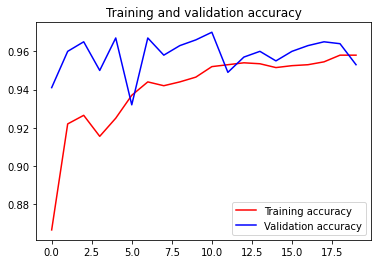

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

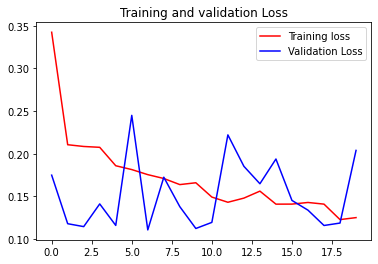

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()